In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
data = pd.read_csv('data/train.csv')
data.head()

,dist,due,f_class,lat,lon,s_class,t_class,target
0,5117.239228,2014-01-22 04:10:00.000,econom,55.669290,37.474336,business,NaN,0
1,3638.726690,2014-01-10 13:45:00.000,econom,55.807461,37.635045,business,NaN,0
2,15143.069693,2014-03-02 02:10:00.000,econom,55.741105,37.615821,NaN,NaN,1
3,-1.000000,2014-02-26 13:20:00.000,econom,55.625526,37.618543,NaN,NaN,1
4,4708.142572,2014-01-21 19:45:00.000,business,55.813167,37.597863,NaN,NaN,0


In [58]:
data.dtypes

dist       float64
due         object
f_class     object
lat        float64
lon        float64
s_class     object
t_class     object
target       int64
dtype: object

In [59]:
data['target']\
    .value_counts()\
    .to_frame()\
    .reset_index()\
    .set_axis(['target', 'counts'], axis=1)

,target,counts
0,0,1016036
1,1,171425


# Explore features

## Dist

Distance `-1` probably means unpecified end point 

In [60]:
data.loc[data['dist'] < 0, 'dist'] = np.nan
data['location_unspecified'] = data['dist'].isna()

In [61]:
dist_threshold = data['dist'].quantile(0.99)

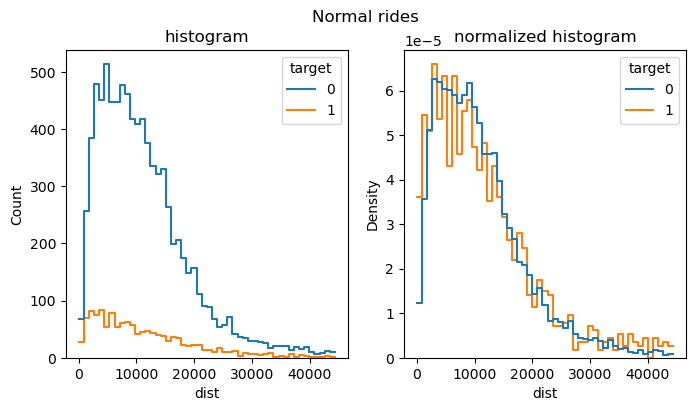

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Normal rides')
axes[0].set_title('histogram')
sns.histplot(
    data.query('dist < @dist_threshold').sample(10_000), 
    x='dist', 
    hue='target',
    fill=False,
    element='step',
    ax=axes[0]
)

axes[1].set_title('normalized histogram')
sns.histplot(
    data.query('dist < @dist_threshold').sample(10_000), 
    x='dist', 
    hue='target',
    fill=False,
    element='step',
    stat='density',
    common_norm=False,
    ax=axes[1]
)

plt.show()

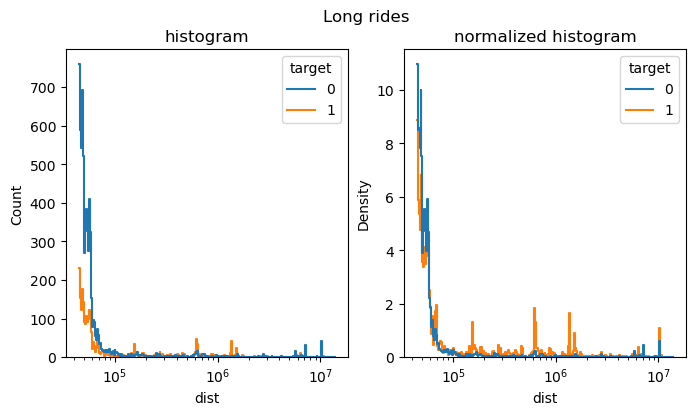

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Long rides')
axes[0].set_title('histogram')
sns.histplot(
    data.query('dist > @dist_threshold'), 
    x='dist', 
    hue='target',
    fill=False,
    element='step',
    log_scale=True,
    ax=axes[0],
)

axes[1].set_title('normalized histogram')
sns.histplot(
    data.query('dist > @dist_threshold'), 
    x='dist', 
    hue='target',
    fill=False,
    element='step',
    stat='density',
    common_norm=False,
    log_scale=True,
    ax=axes[1]
)

plt.show()

In [64]:
data\
    .groupby(['location_unspecified', 'target'])\
    .size()\
    .reset_index()\
    .pivot(index='location_unspecified', columns='target', values=0) / len(data)

target,0,1
location_unspecified,,
False,0.779909,0.115809
True,0.075728,0.028553


## due

In [65]:
data['due'] = pd.to_datetime(data['due'])

In [66]:
data['year'] = data['due'].dt.year
data['month'] = data['due'].dt.month
data['day'] = data['due'].dt.day
data['hour'] = data['due'].dt.hour
data['weekday'] = data['due'].dt.weekday

### year

In [67]:
data['year'].value_counts()

2014    1187461
Name: year, dtype: int64

In [68]:
data.drop('year', axis=1, inplace=True)

### month

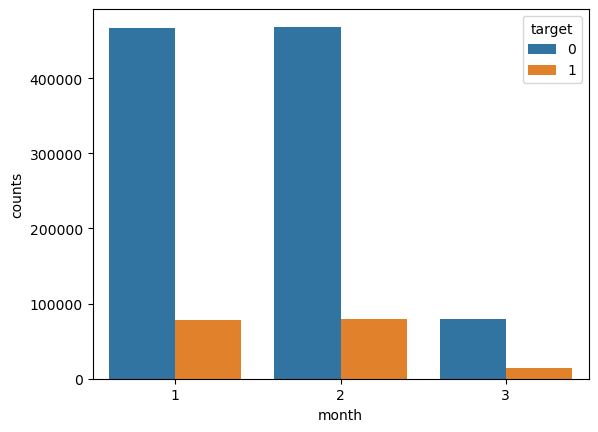

In [69]:
sns.barplot(
    data=data\
        .groupby(['month', 'target'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='month',
    y='counts',
    hue='target'
)

plt.show()

тоже лажа

In [70]:
data.drop('month', axis=1, inplace=True)

### weekday

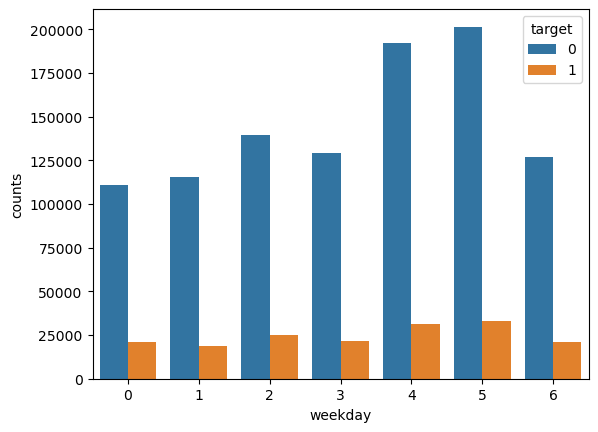

In [71]:
sns.barplot(
    data=data\
        .groupby(['weekday', 'target'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='weekday',
    y='counts',
    hue='target'
)

plt.show()

### hour

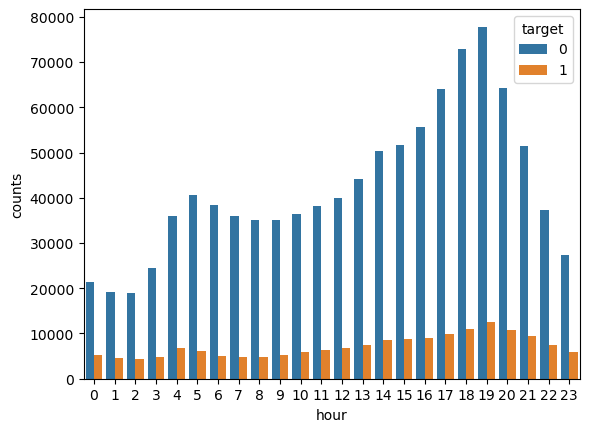

In [72]:
sns.barplot(
    data=data\
        .groupby(['hour', 'target'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='hour',
    y='counts',
    hue='target'
)

plt.show()

## *_class

In [73]:
data['f_class'].unique()

array(['econom', 'business', 'vip', nan], dtype=object)

In [74]:
data['s_class'].unique()

array(['business', nan, 'vip', 'econom'], dtype=object)

In [75]:
data['t_class'].unique()

array([nan, 'vip', 'econom', 'business'], dtype=object)

In [76]:
data[['f_class', 's_class', 't_class', 'target']]\
    .astype(str)\
    .value_counts().\
    reset_index().\
    rename(columns={0: 'counts'})

,f_class,s_class,t_class,target,counts
0,econom,nan,nan,0,586571
1,econom,business,nan,0,250039
2,business,nan,nan,0,112516
3,econom,nan,nan,1,93788
4,econom,business,nan,1,45004
5,business,vip,nan,0,23639
6,business,nan,nan,1,16798
7,vip,nan,nan,0,13530
8,econom,business,vip,0,13181
9,nan,nan,nan,0,9505


In [77]:
data['multi_class'] = \
    data['f_class'].astype(str) + '_' + \
    data['s_class'].astype(str) + '_' + \
    data['s_class'].astype(str)

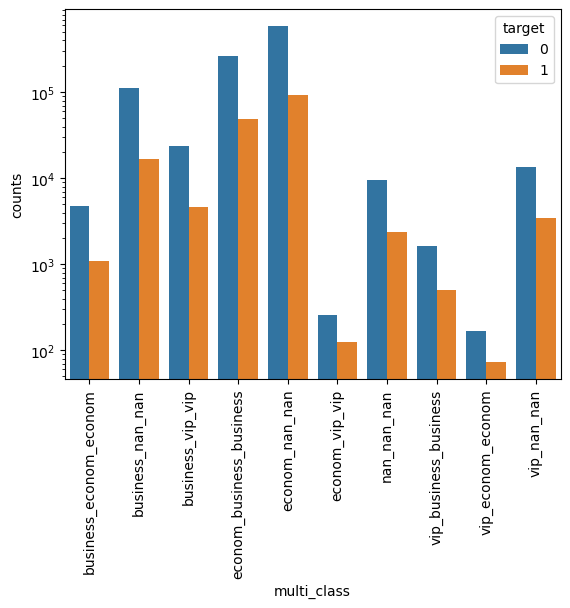

In [78]:
sns.barplot(
    data=data\
        .groupby(['multi_class', 'target'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='multi_class',
    y='counts',
    hue='target',
)

plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Надо заметить, что в данном случае мы хотим найти группы где вероятность отмены больше чем в других.  
В лог шкале отношение колечества это разность между столбиками и именно это надо сранивать в разных группах.

## location

In [79]:
data.loc[data['lat'] < 1, 'lat'] = np.nan
data.loc[data['lon'] < 1, 'lat'] = np.nan

In [80]:
data['location_nan'] = data['lat'].isna() | data['lon'].isna()

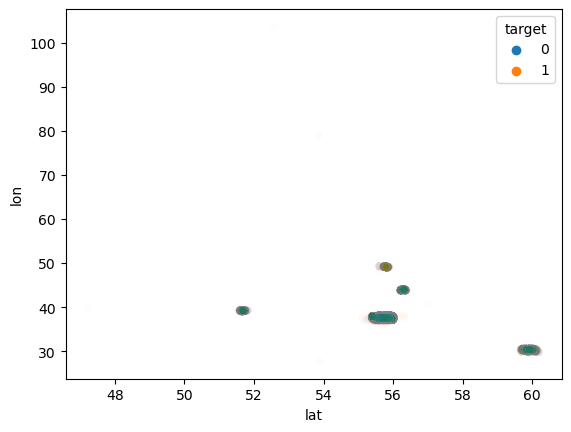

In [81]:
sns.scatterplot(data=data, x='lat', y='lon', hue='target', alpha=0.01)
plt.show()

In [82]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [83]:
# data['district'] = GaussianMixture(n_components=10).fit_predict(data[['lat', 'lon']].fillna(0))
district_cluster = KMeans(n_clusters=6)
data['district'] = district_cluster.fit_predict(data[['lat', 'lon']].fillna(0))

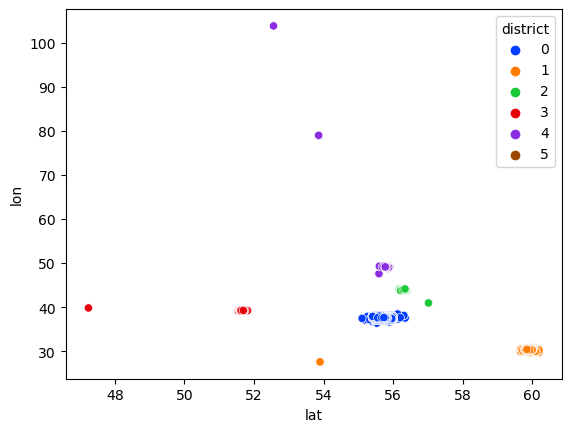

In [84]:
sns.scatterplot(data=data, x='lat', y='lon', hue='district', palette='bright')
plt.show()

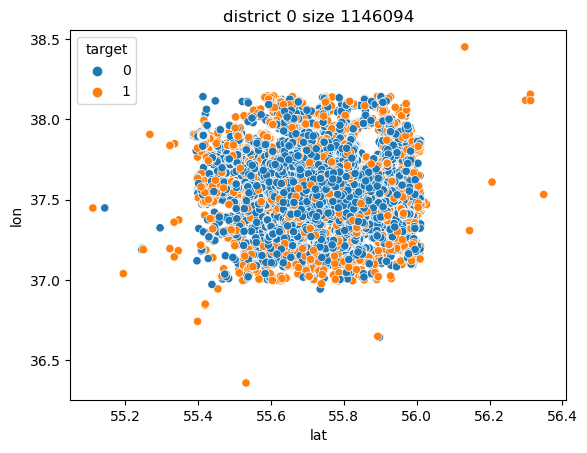

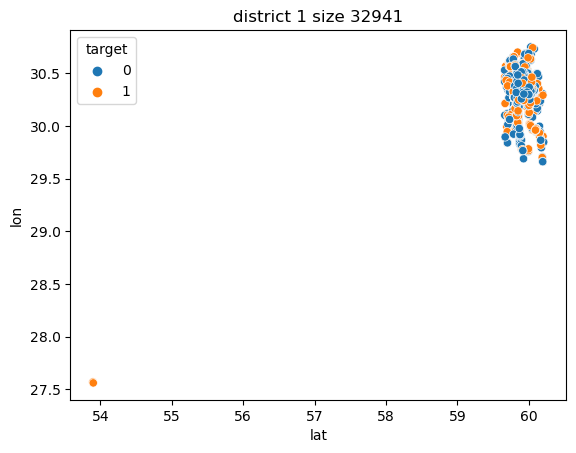

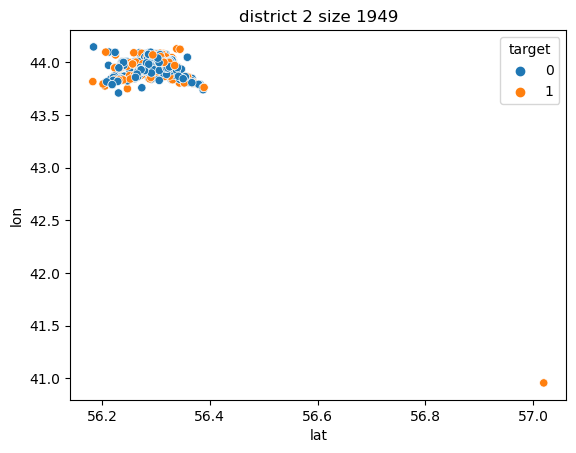

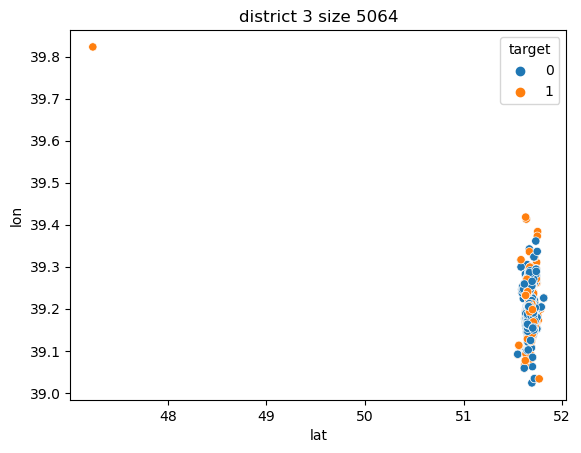

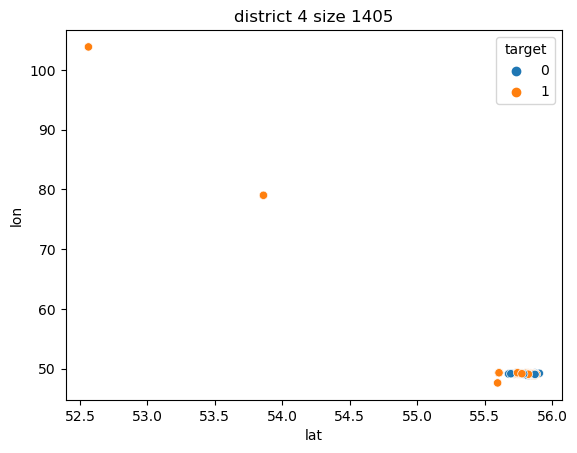

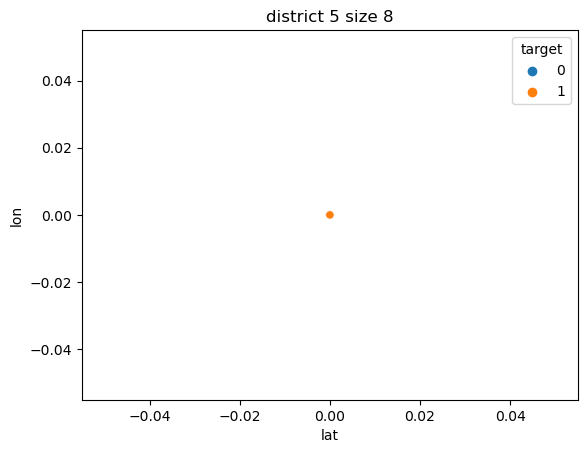

In [85]:
for district, df in data.groupby('district'):
    plt.title(f'district {district} size {len(df)}')
    sns.scatterplot(data=df[['lat', 'lon', 'target']].fillna(0), x='lat', y='lon', hue='target')
    plt.show()

In [86]:
data[['mean_lat', 'mean_lon']] = data.groupby('district')[['lat', 'lon']].transform('mean')
data['distance_district_center'] = (
    (data['lat'] - data['mean_lat'])**2 + 
    (data['lon'] - data['mean_lon'])**2
) ** (1/2)

In [87]:
data['district_std'] = data.groupby('district')['distance_district_center'].transform('std')
data['distance_district_center_norm'] = data['distance_district_center'] / data['district_std'] 

In [88]:
dist_threshold = data['distance_district_center'].quantile(0.98)

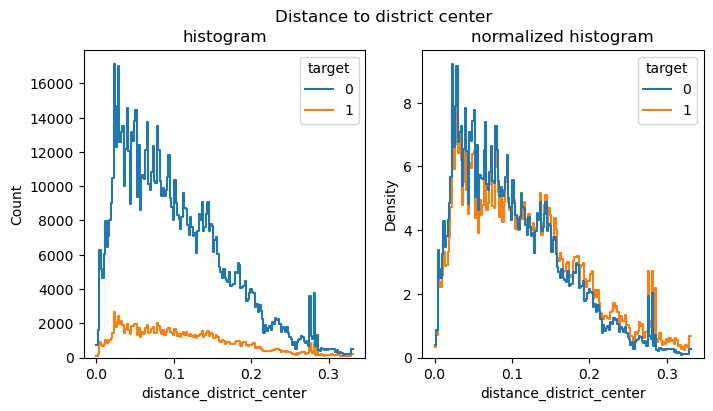

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Distance to district center')
axes[0].set_title('histogram')
sns.histplot(
    data.query('distance_district_center < @dist_threshold'), 
    x='distance_district_center', 
    hue='target',
    fill=False,
    element='step',
    ax=axes[0],
)

axes[1].set_title('normalized histogram')
sns.histplot(
    data.query('distance_district_center < @dist_threshold'), 
    x='distance_district_center', 
    hue='target',
    fill=False,
    element='step',
    stat='density',
    common_norm=False,
    ax=axes[1],
)

plt.show()

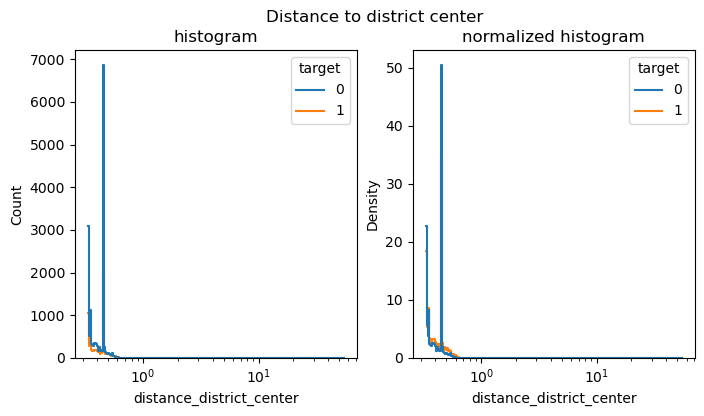

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Distance to district center')
axes[0].set_title('histogram')
sns.histplot(
    data.query('distance_district_center >= @dist_threshold'), 
    x='distance_district_center', 
    hue='target',
    fill=False,
    element='step',
    ax=axes[0],
    log_scale=True
)

axes[1].set_title('normalized histogram')
sns.histplot(
    data.query('distance_district_center >= @dist_threshold'), 
    x='distance_district_center', 
    hue='target',
    fill=False,
    element='step',
    stat='density',
    common_norm=False,
    ax=axes[1],
    log_scale=True
)

plt.show()

Можно увидеть артефакты кластеризации  
Пока забьем на них

In [91]:
dist_threshold = data['distance_district_center_norm'].quantile(0.98)

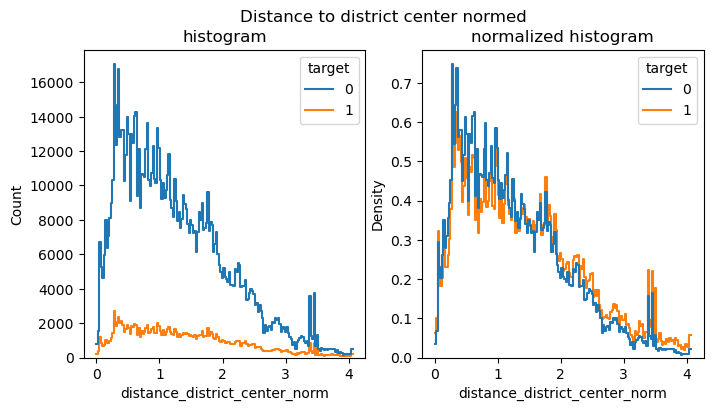

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Distance to district center normed')
axes[0].set_title('histogram')
sns.histplot(
    data.query('distance_district_center_norm < @dist_threshold'), 
    x='distance_district_center_norm', 
    hue='target',
    fill=False,
    element='step',
    ax=axes[0],
)

axes[1].set_title('normalized histogram')
sns.histplot(
    data.query('distance_district_center_norm < @dist_threshold'), 
    x='distance_district_center_norm', 
    hue='target',
    fill=False,
    element='step',
    stat='density',
    common_norm=False,
    ax=axes[1],
)

plt.show()

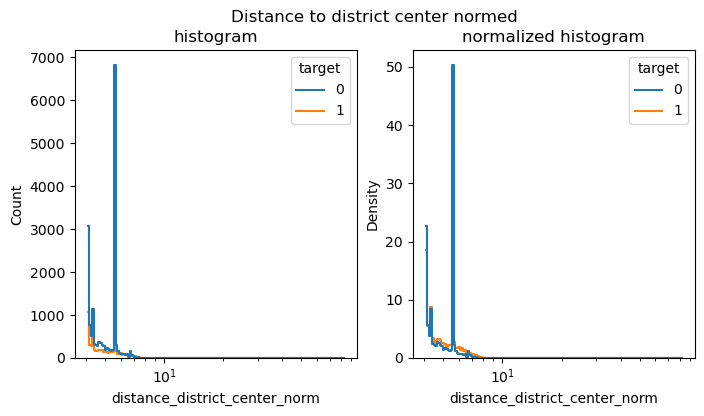

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

fig.suptitle('Distance to district center normed')
axes[0].set_title('histogram')
sns.histplot(
    data.query('distance_district_center_norm >= @dist_threshold'), 
    x='distance_district_center_norm', 
    hue='target',
    fill=False,
    element='step',
    ax=axes[0],
    log_scale=True
)

axes[1].set_title('normalized histogram')
sns.histplot(
    data.query('distance_district_center_norm >= @dist_threshold'), 
    x='distance_district_center_norm', 
    hue='target',
    fill=False,
    element='step',
    stat='density',
    common_norm=False,
    ax=axes[1],
    log_scale=True
)

plt.show()

In [94]:
data.head()

,dist,due,f_class,lat,lon,s_class,t_class,target,location_unspecified,day,hour,weekday,multi_class,location_nan,district,mean_lat,mean_lon,distance_district_center,district_std,distance_district_center_norm
0,5117.239228,2014-01-22 04:10:00,econom,55.669290,37.474336,business,NaN,0,False,22,4,2,econom_business_business,False,0,55.747803,37.587953,0.138105,0.081481,1.694933
1,3638.726690,2014-01-10 13:45:00,econom,55.807461,37.635045,business,NaN,0,False,10,13,4,econom_business_business,False,0,55.747803,37.587953,0.076005,0.081481,0.932796
2,15143.069693,2014-03-02 02:10:00,econom,55.741105,37.615821,NaN,NaN,1,False,2,2,6,econom_nan_nan,False,0,55.747803,37.587953,0.028662,0.081481,0.351759
3,NaN,2014-02-26 13:20:00,econom,55.625526,37.618543,NaN,NaN,1,True,26,13,2,econom_nan_nan,False,0,55.747803,37.587953,0.126045,0.081481,1.546926
4,4708.142572,2014-01-21 19:45:00,business,55.813167,37.597863,NaN,NaN,0,False,21,19,1,business_nan_nan,False,0,55.747803,37.587953,0.066111,0.081481,0.811368


# Create base model

In [95]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from catboost import CatBoostClassifier
beta = 0.2

In [96]:
data.head()

,dist,due,f_class,lat,lon,s_class,t_class,target,location_unspecified,day,hour,weekday,multi_class,location_nan,district,mean_lat,mean_lon,distance_district_center,district_std,distance_district_center_norm
0,5117.239228,2014-01-22 04:10:00,econom,55.669290,37.474336,business,NaN,0,False,22,4,2,econom_business_business,False,0,55.747803,37.587953,0.138105,0.081481,1.694933
1,3638.726690,2014-01-10 13:45:00,econom,55.807461,37.635045,business,NaN,0,False,10,13,4,econom_business_business,False,0,55.747803,37.587953,0.076005,0.081481,0.932796
2,15143.069693,2014-03-02 02:10:00,econom,55.741105,37.615821,NaN,NaN,1,False,2,2,6,econom_nan_nan,False,0,55.747803,37.587953,0.028662,0.081481,0.351759
3,NaN,2014-02-26 13:20:00,econom,55.625526,37.618543,NaN,NaN,1,True,26,13,2,econom_nan_nan,False,0,55.747803,37.587953,0.126045,0.081481,1.546926
4,4708.142572,2014-01-21 19:45:00,business,55.813167,37.597863,NaN,NaN,0,False,21,19,1,business_nan_nan,False,0,55.747803,37.587953,0.066111,0.081481,0.811368


In [97]:
num_features = [
    'dist', 'lat', 'lon', 
    'distance_district_center', 'distance_district_center_norm'
]
cat_features = [
    'f_class', 's_class', 't_class', 
    'location_unspecified', 'hour', 'weekday', 
    'multi_class', 'location_nan', 'district'
]

In [98]:
data[cat_features] = data[cat_features].astype(str)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    data[num_features + cat_features], 
    data['target'], 
    test_size=0.25
)

In [100]:
model = CatBoostClassifier(cat_features=cat_features)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict(X_test)

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [101]:
fbeta_score(y_test, y_pred, beta=beta)

0.36374109147710626

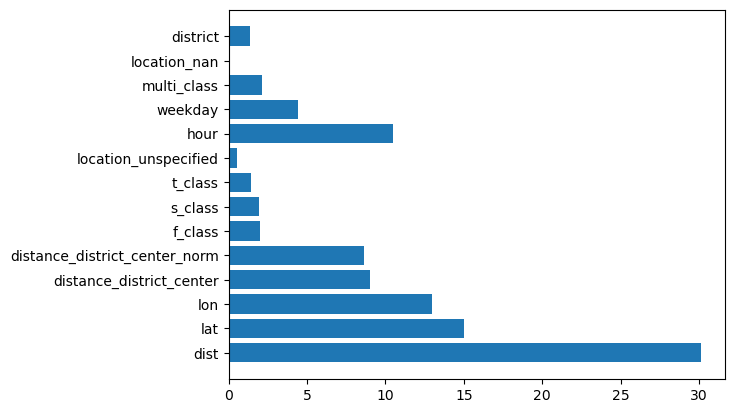

In [102]:
plt.barh(y=X_train.columns, width=model.feature_importances_)
plt.show()

# Predict

In [114]:
predict = pd.read_csv('data/test.csv')
predict['index'] = predict.index

In [115]:
predict.loc[predict['dist'] < 0, 'dist'] = np.nan
predict['location_unspecified'] = predict['dist'].isna()

predict['due'] = pd.to_datetime(predict['due'])
predict['year'] = predict['due'].dt.year
predict['month'] = predict['due'].dt.month
predict['day'] = predict['due'].dt.day
predict['hour'] = predict['due'].dt.hour
predict['weekday'] = predict['due'].dt.weekday

predict['multi_class'] = \
    predict['f_class'].astype(str) + '_' + \
    predict['s_class'].astype(str) + '_' + \
    predict['s_class'].astype(str)

predict.loc[predict['lat'] < 1, 'lat'] = np.nan
predict.loc[predict['lon'] < 1, 'lat'] = np.nan

predict['location_nan'] = predict['lat'].isna() | predict['lon'].isna()
predict['district'] = district_cluster.predict(predict[['lat', 'lon']].fillna(0))

In [116]:
predict['district'] = predict['district'].astype(str)
predict = predict.merge(
    data[['district', 'mean_lat', 'mean_lon', 'district_std']].drop_duplicates(subset=['district']),
    on='district',
    how='left'
)

predict['distance_district_center'] = (
    (predict['lat'] - predict['mean_lat'])**2 + 
    (predict['lon'] - predict['mean_lon'])**2
) ** (1/2)

predict['distance_district_center_norm'] = predict['distance_district_center'] / data['district_std'] 

In [117]:
predict[cat_features] = predict[cat_features].astype(str)

In [118]:
predict['target'] = model.predict(predict[num_features + cat_features])

/home/denis/miniconda3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [120]:
predict['target'].value_counts()

0    506788
1      4149
Name: target, dtype: int64

Подозрительно мало отмен

In [121]:
predict[['index', 'target']].to_csv('data/sub1.csv', index=False)